In [101]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [102]:
def cyl_intercept(t, x_0, y_0, a, b):
    f = (x_0+t*a)**2 + (y_0 + t*b)**2 - 25
    return f

def check_end(t):
    return t < 20

def reflection(t,x_0, y_0, a, b):
    t = float(t)
    intercept = np.array([x_0+a*t, y_0+b*t])
    old_direction = np.array([a,b])
    normal = -1*intercept/np.linalg.norm(intercept)
    dot_prod = np.dot(normal, old_direction)
    reflected = old_direction - 2*dot_prod*normal
    return reflected


In [103]:
def compute_reflections(position):
    t = 0.0
    direction = np.array([0.0,0.6])
    t0 = optimize.fsolve(cyl_intercept,[-1,1], args=(*position,*direction))
    c = 0.1
    while(np.isclose(t0[0], t0[1])):
        t0 = optimize.fsolve(cyl_intercept,[-1-c,1+c], args=(*position,*direction))
        c += c

    t0=max(t0)

    while check_end(t + abs(t0)):
        t += abs(t0) 
        position = position + (direction*t0)
        direction = reflection(t0,*position, *direction)
        c = 0.1
        t0 = 0.0
        while(np.isclose(t0, 0.0)):
            t0 = max(optimize.fsolve(cyl_intercept,[-1-c,1+c], args=(*position,*direction)))
            c += c
    
    return position + (direction*(20-t))
           
def gen_random_point():
    point = np.random.rand(2)
    point -= 0.5
    point *= 4.9
    return point

def check_bounds(point):
    return(np.linalg.norm(point) >= 5.0)
    

In [104]:
points_x, points_y = [],[]
for i in range(100000):
    point = gen_random_point()
    while check_bounds(point):
        point = gen_random_point()
    
    point = compute_reflections(point)
    if check_bounds(point):
        pass
    else:
        points_x.append(point[0])
        points_y.append(point[1])


C:\Users\Toby\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(-5.0, 5.0)

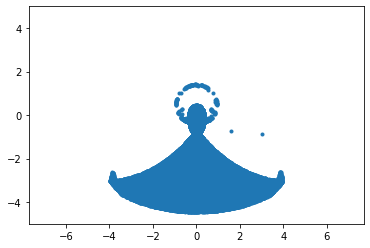

In [105]:
plt.scatter(points_x, points_y, marker=".")
plt.axis("equal")
plt.ylim(-5,5)

In [106]:
points_x = np.array(points_x)
points_y = np.array(points_y)
stacked_points = np.floor(np.stack((9*points_x,9*points_y), 1)).astype(int)

def count_points (x, y, points):
    #Had to steal this :(
    val = np.array([x,y])   # the value I want to count (can be iterator, in a list, etc.)
    temp = np.ascontiguousarray(points).view(np.dtype((np.void, points.dtype.itemsize * points.shape[1])))  # convert the 2d-array into an array of analyzable patterns
    xt=np.ascontiguousarray(val).view(np.dtype((np.void, val.dtype.itemsize * val.shape[0])))  # convert what you search into one analyzable pattern      
    return np.sum(temp==xt)# count of the searched pattern in the list of patterns

image = np.empty((100,100),dtype=int)
for i, n in np.ndenumerate(image):
    image[i] = count_points(i[0]-50, i[1]-50, stacked_points)
print(image)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


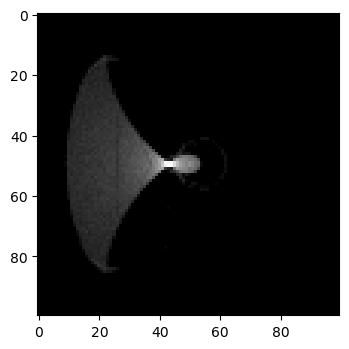

In [112]:
plt.figure(dpi=100)
plt.imshow(np.sqrt(image))